<br/><br/><br/><br/>
<h1> 실습 문제 </h1>


###  다음과 같은 [그림 5] 의 그래프에 대해서 아래 질문들에 답하시오.

![Exercise](fig5.png)

###  실습 1. 
####  [그림 5] 의 그래프에 대해,  ' adjacency list' 표현의 파이썬 코드를 구하시오.


In [63]:
my_adjacency_list = {
             'A': [['B', 2], ['F', 7], ['G', 3]],
             'B': [['A', 2],['C', 4]],
             'C': [['B', 4], ['D', 2],['H', 2]],         
             'D': [['C', 2], ['E', 1],['H', 8]],
             'E': [['D', 1], ['F', 6],['I', 2]],             
             'F': [['A', 7], ['E', 6],['I', 5]],             
             'G': [['A', 3], ['B', 6],['H', 3],['I', 1]],             
             'H': [['C', 2], ['D', 8],['G', 3]],             
             'I': [['E', 2], ['F', 5],['G', 1],['H', 4]]  }

###  실습 2(a). 
####   'weighted  adjacency list'  파이썬 표현으로부터,  'weighted adjacency matrix'  표현을 구할 수있는  파이썬 함수를 코딩하여 보시오. (node 순서는  알파벳 올림차순 임(즉,  A,  B, C, D, E, F, G, H, I.)
###  실습 2(b)
#### 실습 2(a)에서 구한 함수를 이용하여, 실습1  의 [그림 5] 의 그래프에 대한  ' adjacency list'  파이썬 표현으로부터,  'weighted adjacency matrix'  을 구하여 보시오. 

In [64]:
def sort_dictionary(adjL):
    tmp=dict(sorted(adjL.items()))
    for s in tmp:
      tmp[s].sort()
    return tmp

def weight_adj_mat(my_adjacency_list): 
    n = len(my_adjacency_list) 
    nodes = list()    
    adjList = sort_dictionary(my_adjacency_list) 
    for key in adjList:  
        nodes.append(key)
    nodes.sort()
    adM = [[] for _ in range(n)]     
    k = 0 
    j = 0 
    for node in nodes:        
        if my_adjacency_list[node]:
            for s in my_adjacency_list[node]:
                i = 0 
                while(i < n):                   
                    if i >= j:                       
                        if s[0] == nodes[i]:
                            adM[k].append(s[1])
                            j = i + 1     
                            i = n
                        else:
                            adM[k].append(0)  
                            i += 1
                    else: i += 1
            if j< n: 
                for _ in range(j, n):
                    adM[k].append(0)  
        else:
            for _ in range(n):
                adM[k].append(0)
        k += 1
        j = 0
    return adM    

In [65]:
weight_adj_mat(my_adjacency_list)

[[0, 2, 0, 0, 0, 7, 3, 0, 0],
 [2, 0, 4, 0, 0, 0, 0, 0, 0],
 [0, 4, 0, 2, 0, 0, 0, 2, 0],
 [0, 0, 2, 0, 1, 0, 0, 8, 0],
 [0, 0, 0, 1, 0, 6, 0, 0, 2],
 [7, 0, 0, 0, 6, 0, 0, 0, 5],
 [3, 6, 0, 0, 0, 0, 0, 3, 1],
 [0, 0, 2, 8, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 2, 5, 1, 4, 0]]

### 실습 3.
#### "networkx'  파이썬 패키지를 사용하여 [그림 5]의 그래프를 그려 보시오. 단, 아래 pos 변수를 이용하여 출력 예시와  반드시 동일하게 출력해야 합니다.

<출력 예시>

![Altext](prob0.png)

<br/>※ 풀이조건
<ol>
    <li>그래프를 그릴 때 크기 및 색상은 자유롭게 하되, 각 노드 및 엣지를 '알아볼 수 있도록' 그린다.</li>
</ol>
<br/> ※ 제한조건
<ol>
    <li>pos 변수를 사용하여 각 노드 및 엣지의 위치는 위 출력 예시와 동일하게 출력되어야 한다. 안 되었을 시 0.5점 감점한다.</li>
</ol>


Nodes of graph: 
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
Weighted Edges of graph: 
[('A', 'B'), ('A', 'F'), ('A', 'G'), ('B', 'C'), ('B', 'G'), ('C', 'D'), ('C', 'H'), ('D', 'H'), ('D', 'E'), ('E', 'F'), ('E', 'I'), ('F', 'I'), ('G', 'H'), ('G', 'I'), ('H', 'I')]
{'B': {'weight': 2}, 'F': {'weight': 7}, 'G': {'weight': 3}}


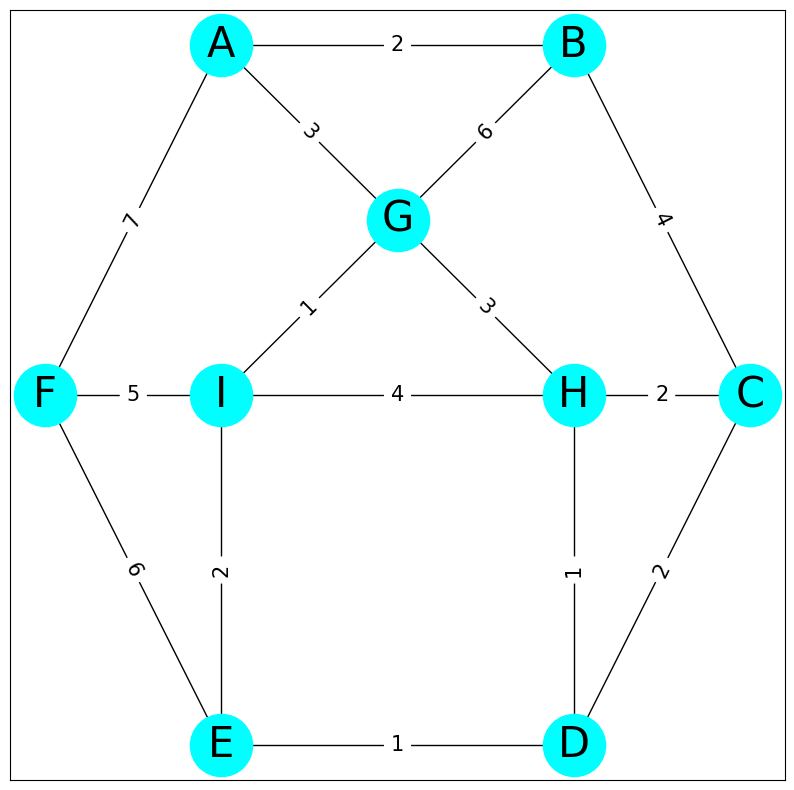

In [66]:
import networkx as nx 
import matplotlib.pyplot as plt
G2=nx.Graph()
Nodes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
G2.add_nodes_from(Nodes)
G2.add_weighted_edges_from([('A', 'B', 2), ('A', 'F', 7), ('A', 'G', 3), 
                           ('B', 'C', 4), ('B', 'G', 6), ('C', 'D', 2), 
                           ('C', 'H', 2), ('D', 'H', 1), ('D', 'E', 1), 
                           ('E', 'F', 6), ('E', 'I', 2), ('F', 'I', 5), 
                           ('G', 'H', 3), ('G', 'I', 1), ('H', 'I', 4)])
print("Nodes of graph: ")
print(G2.nodes())
print("Weighted Edges of graph: ")
print(G2.edges())
print(G2['A'])
plt.figure(figsize=(10, 10))
A, B, C, D, E, F, G, H, I = 'ABCDEFGHI'
pos = {A:(1, 2), B:(3, 2), C:(4, 1), D:(3, 0), E:(1, 0), F:(0, 1), G:(2, 1.5), H:(3, 1), I:(1, 1) }
nx.draw_networkx_nodes(G2, pos=pos, node_size=2000, node_color='cyan')
nx.draw_networkx_edges(G2, pos=pos)
nx.draw_networkx_labels(G2, pos=pos, font_size=30)
edge_labels = {(u, v): d['weight'] for u, v, d in G2.edges(data=True)}
nx.draw_networkx_edge_labels(G2, pos=pos, edge_labels=edge_labels, font_size=15)
plt.show()

#### 실습  4.
#### "networkx' 파이썬 패키지를 사용하여 위에서 그린 그래프에서 노드 F 에서 노드 B, C, D, H, G 까지의 최단 경로와 최단 거리를 각각 구하여 출력하시오. 단, 아래 출력 예시에 맞게 출력해야 합니다.

<출력 예시>
<br/>노드 F에서 노드 E까지 최단 경로는 ['F', 'E'] 이며 최단 거리는 6 이다.

※ 풀이조건
<ol>
    <li>"networkx' 파이썬 패키지 내 함수 및 클래스를 사용하여 시작 노드를 F로, 도착 노드를 B, C, D, H, G 중 하나씩 설정해서 총 5개의 최단 경로와 최단 거리를 구하여 출력한다. (예: (F-B), (F-C), (F-D), (F-H), (F-G) 로, 총 5개)</li>
    <li>최단 경로가 2개 이상일 경우 아무 것이나 1개를 택하여 출력한다.</li>
</ol>
<br/> ※ 제한조건
<ol>
    <li>5개 경로 및 거리가 모두 올바른 값이면 정답 처리 한다.</li>
    <li>다른 패키지 함수를 이용하여 간단히 구현해도 정답처리한다. 단 실습 3의 답과 동일하게 구현하면 0점 처리한다.</li>
</ol>


In [67]:
dic = {}
arr = ['B', 'C', 'D', 'H', 'G']
for i in arr:
    print("F 부터 {}까지의 최단 경로 : {}".format(i, nx.shortest_path_length(G2, "F", i, "weight")))
    dic[i] = nx.shortest_path_length(G2, "F", i, "weight")    

result = sorted(dic.items(), key=lambda x : x[1])

print("가장 짧은 경로는 (F-{}) : {} 이다.".format(result[0][0], result[0][1]))

F 부터 B까지의 최단 경로 : 9
F 부터 C까지의 최단 경로 : 9
F 부터 D까지의 최단 경로 : 7
F 부터 H까지의 최단 경로 : 8
F 부터 G까지의 최단 경로 : 6
가장 짧은 경로는 (F-G) : 6 이다.
